#Introduction to regression with neural network in tensorflow
predicting a numerical value based on some other combinations of variables






In [1]:
#import tensorflow
import tensorflow as tf

Creating data to view and fit

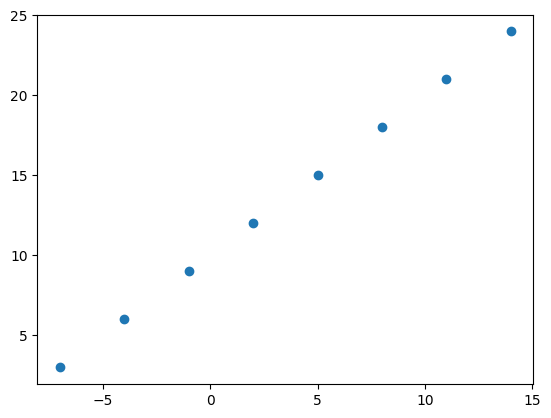

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
#visualise it
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and output shapes

In [4]:
#create a demo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
#turn numpy arrays into tensors with float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

#steps in modeling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning
2. **Compiling a model** - define the loss function(which tells us how wrong the model is) and the optimizer(tells our model how to improve the pattern its learning) and evaluation metrics (use to interpret the performnace of our model)
3. ** Fitting a model** - letting the model try to find patterns between X and y(features and labels)

In [7]:
#set random seed
tf.random.set_seed(42)
#1. create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 552ms/step - loss: 15.7984 - mae: 15.7984
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 15.5171 - mae: 15.5171
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 15.2359 - mae: 15.2359
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 14.9585 - mae: 14.9585
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 14.8260 - mae: 14.8260


In [8]:
#check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
#try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[-5.9609375]], dtype=float32)

Improving our model

We can improve our model by altering the steps we took to create a model
1. ** Creating a model **- here we might add more layers, increasing the no of hidden units (neurons) within each of the hidden layer, change the activation function of each layer
2.** Compiling a model **- here we might change the optimization function or its learning rate
3. **Fitting a model**- fit a model for large epocs ( leave it training for longer) or on more data

In [10]:
#lets rebuild our model
#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 317ms/step - loss: 18.0405 - mae: 18.0405
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 17.7593 - mae: 17.7593
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 17.4780 - mae: 17.4780
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 17.1968 - mae: 17.1968
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 16.9155 - mae: 16.9155
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 16.6343 - mae: 16.6343
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 16.3530 - mae: 16.3530
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 16.0718 - mae: 16.0718
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 15.7905 - mae: 15.7905
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 15.5093 - mae: 15.5093
Epoch 11/100
1/1 [==============================

In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 92ms/step


array([[29.581335]], dtype=float32)

In [13]:
#another change to improve our model
#1. create the model(with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([

     tf.keras.layers.Dense(100, activation="relu", input_shape=(1,)),
     tf.keras.layers.Dense(1)
])
#2. compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.3313 - mae: 14.3313
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.5304 - mae: 13.5304
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 12.7598 - mae: 12.7598
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.1882 - mae: 12.1882
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 11.6206 - mae: 11.6206
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 11.0609 - mae: 11.0609
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5066 - mae: 10.5066
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 9.9509 - mae: 9.9509
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 9.3860 - mae: 9.3860
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 8.8101 - mae: 8.8101
Epoch 11/100
1/1 [==============================] - 0s 19

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 181ms/step


array([[27.011766]], dtype=float32)

##Evaluating a model
In practice, a typical workflow we'll go through when building a neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

In [15]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
#make labels for dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

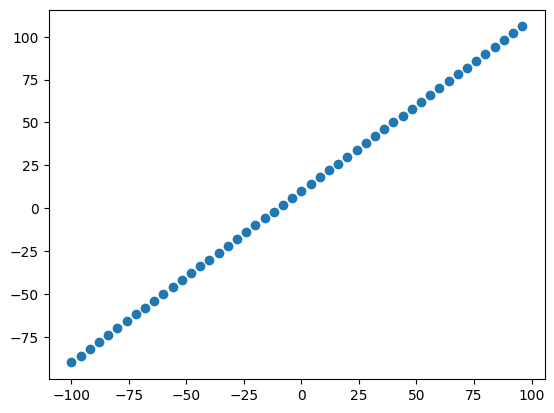

In [17]:
#Visualise the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets..
* Training set - the model learns from this data, which is 70-80% of the total data availabe
* Validation Set - the model gets tuned on this data, which is 10-15% of the data available
* Test set - model gets evaluated om this data which is 10-15% of the total data available

In [18]:
len(X)

50

In [19]:
#split the data into train and test data
X_train = X[:40] #first 40 are training samples (80% of the data)
y_train = y[:40]

X_test=X[40:] #last 10 are testing samples
y_test = y[40:]

len(X_train), len(y_train)

(40, 40)

### Visualizing the data

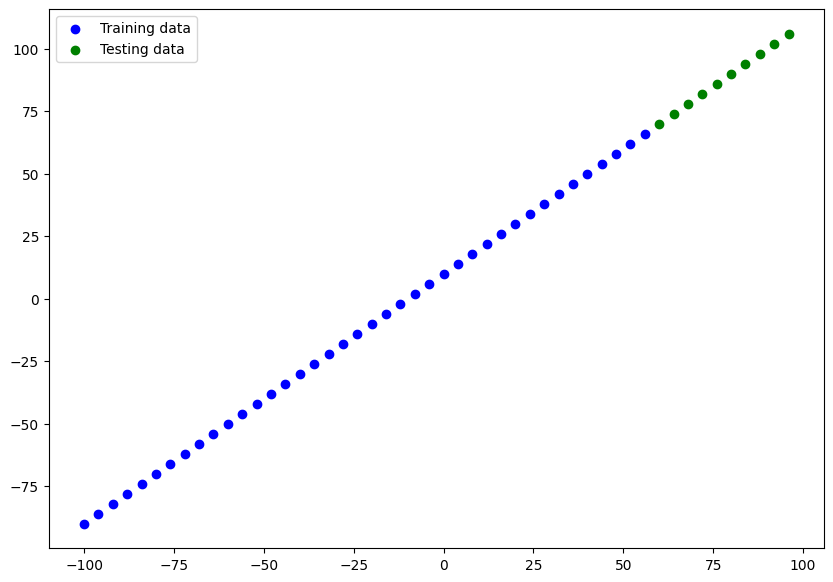

In [20]:
plt.figure(figsize=(10, 7))
#PLot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")
plt.scatter(X_test, y_test, c="g", label = "Testing data")
plt.legend()

In [21]:
#lets have a look on how to build neural network for our data
#1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

#2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total no of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training(this is when you borrow parameters from other models during transfer learning)

In [23]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 72.4064 - mae: 72.4064
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 37.1248 - mae: 37.1248
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 8.2683 - mae: 8.2683
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 7.5738 - mae: 7.5738
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5881 - mae: 7.5881
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0337 - mae: 9.0337
Epoch 7/100
2/2 [==============================] - 0s 49ms/step - loss: 9.4468 - mae: 9.4468
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 9.3073 - mae: 9.3073
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 7.5427 - mae: 7.5427
Epoch 10/100
2/2 [==============================] - 0s 19ms/step - loss: 12.5575 - mae: 12.5575
Epoch 11/100
2/2 [==============================] - 0s 22ms/step 

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


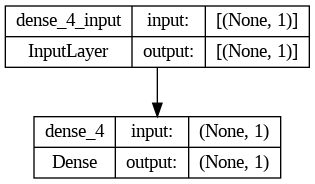

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

Visualizing our model prediction

In [26]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 254ms/step


array([[44.40966 ],
       [47.284763],
       [50.159866],
       [53.03497 ],
       [55.910072],
       [58.785175],
       [61.660275],
       [64.53538 ],
       [67.410484],
       [70.28558 ]], dtype=float32)

In [27]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [28]:
#Let's create a plotting function
def plot_predicitons(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  #plot training data, test data & compaer
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b",label="Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #show the legend
  plt.legend();

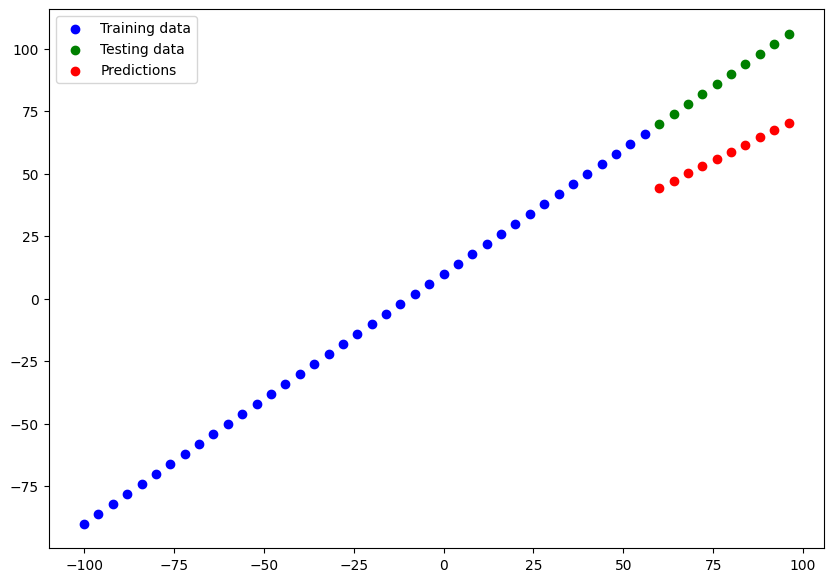

In [29]:
plot_predicitons(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [30]:
#evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 221ms/step - loss: 30.6524 - mae: 30.6524


[30.65237808227539, 30.65237808227539]

In [31]:
#calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.59034 , 40.715237, 37.840134, 34.96503 , 32.089928, 29.214825,
       26.339725, 23.464622, 20.589516, 17.771534], dtype=float32)>

In [32]:
#make functions to resue MAE & MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)


###Running experiments to improve the model
1. Get more data - get more examples for your model to train on
2. Make your model larger - this might come in the form of more layers or hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data
Let's do 3 modelling experiments:
1. `model_1` - same as the original , 1 layers, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 lyers, tranied for 500 epochs

In [33]:
#set random seed
tf.random.set_seed(42)

#1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

#2.compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model:
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 25ms/step - loss: 9.2346 - mae: 9.2346
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 9.7122 - mae: 9.7122
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 10.8701 - mae: 10.8701
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 9.4343 - mae: 9.4343
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 10.3246 - mae: 10.3246
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 9.5675 - mae: 9.5675
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 8.6843 - mae: 8.6843
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0484 - mae: 9.0484
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 19.0474 - mae: 19.0474
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2747 - mae: 10.2747
Epoch 11/100
2/2 [==============================] - 0s 11ms/s

1/1 [==============================] - 0s 46ms/step


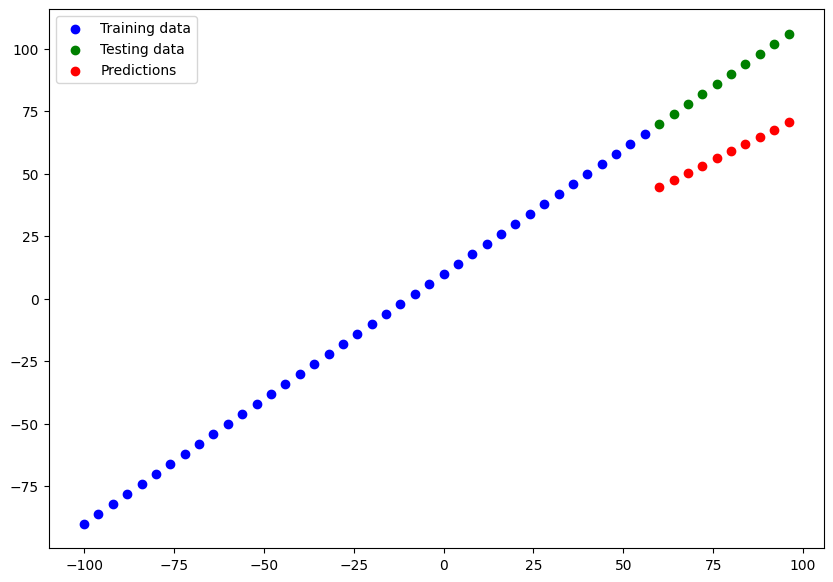

In [41]:
#make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predicitons(predictions=y_preds_1)

In [35]:
y_preds_1, tf.squeeze(y_preds_1)

(array([[44.59836 ],
        [47.48304 ],
        [50.36772 ],
        [53.252403],
        [56.137085],
        [59.021767],
        [61.906452],
        [64.79113 ],
        [67.67581 ],
        [70.5605  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.59836 , 47.48304 , 50.36772 , 53.252403, 56.137085, 59.021767,
        61.906452, 64.79113 , 67.67581 , 70.5605  ], dtype=float32)>)

In [36]:
#calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.420574>,
 <tf.Tensor: shape=(), dtype=float32, numpy=935.67365>)

#build model 2

In [49]:
#set the random seed
tf.random.set_seed(42)

#1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1, input_shape=(1,))
])

#2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 43.5802 - mae: 43.5802
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 33.1286 - mae: 33.1286
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.5623 - mae: 29.5623
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 15.9909 - mae: 15.9909
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 21.9491 - mae: 21.9491
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.3712 - mae: 11.3712
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4460 - mae: 12.4460
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0420 - mae: 11.0420
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.3644 - mae: 39.3644
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 26.9007 - mae: 26.9007
Epoch 11/100
2/2 [==============================] - 0s 7

1/1 [==============================] - 0s 55ms/step


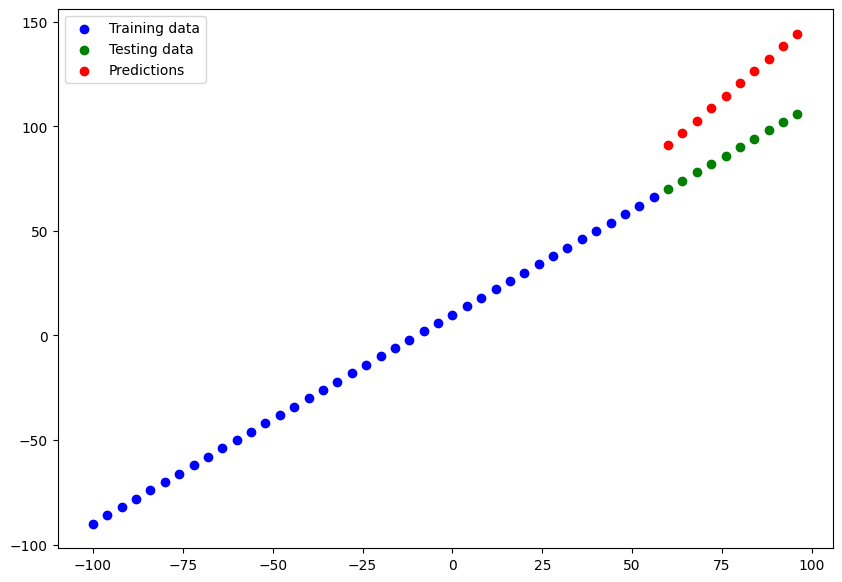

In [50]:
#make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predicitons(predictions=y_preds_2)


build model3

In [51]:
#set the random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1, input_shape=(1,))
])

#2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 51.4780 - mae: 51.4780
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 28.6316 - mae: 28.6316
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 33.9124 - mae: 33.9124
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 26.7302 - mae: 26.7302
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.6275 - mae: 14.6275
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.6608 - mae: 11.6608
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 12.7265 - mae: 12.7265
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0547 - mae: 11.0547
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 39.9967 - mae: 39.9967
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4528 - mae: 27.4528
Epoch 11/500
2/2 [==============================] - 0s 6ms

1/1 [==============================] - 0s 90ms/step


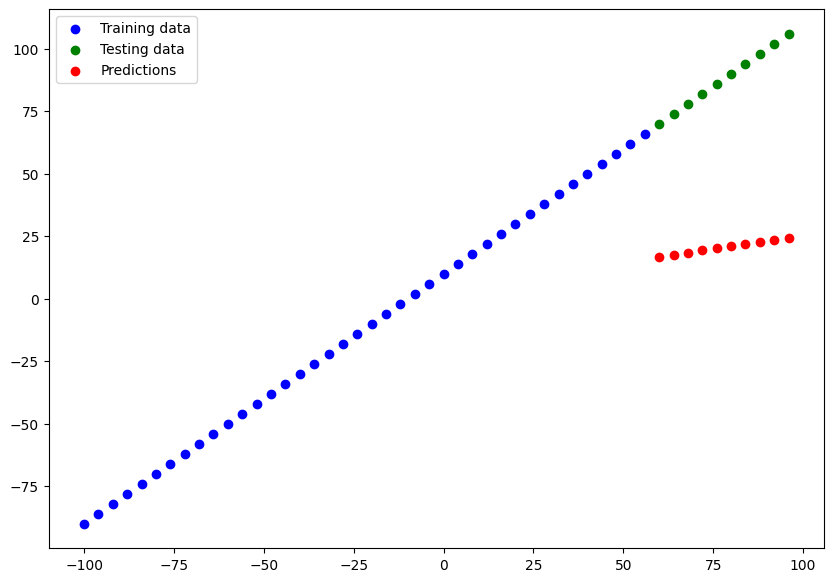

In [52]:
y_preds_3=model_3.predict(X_test)
plot_predicitons(predictions=y_preds_3)

In [53]:
#Let's compaer our model's results using pandas
import pandas as pd

model_results = [["model_"]]

Saving our models

There are two main formats we can save our model:
1. The SavedModel format
2. The HDF5 format

In [54]:
#save the model using SavedModel format
model_2.save("best_model_SavedModel_format")

In [55]:
#save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading in a saved model

In [56]:
# Load in the SaveModel format modek
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


A larger example

In [57]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
#read the insurance datset straight form github
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [60]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [62]:
#one hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [63]:
#create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [64]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [65]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [66]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [82]:
#build a neural network
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#fit the model
history = insurance_model.fit(X_train, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 3s 8ms/step - loss: 13271.3604 - mae: 13271.3604
Epoch 2/200
34/34 [==============================] - 0s 9ms/step - loss: 13099.2607 - mae: 13099.2607
Epoch 3/200
34/34 [==============================] - 0s 9ms/step - loss: 12742.1611 - mae: 12742.1611
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12051.9307 - mae: 12051.9307
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10914.7549 - mae: 10914.7549
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9480.4014 - mae: 9480.4014
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8168.7402 - mae: 8168.7402
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7536.9663 - mae: 7536.9663
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7430.2637 - mae: 7430.2637
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.1470 - mae:

In [81]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3493.7234 - mae: 3493.7234


[3493.723388671875, 3493.723388671875]

In [73]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Text(0.5, 0, 'epochs')

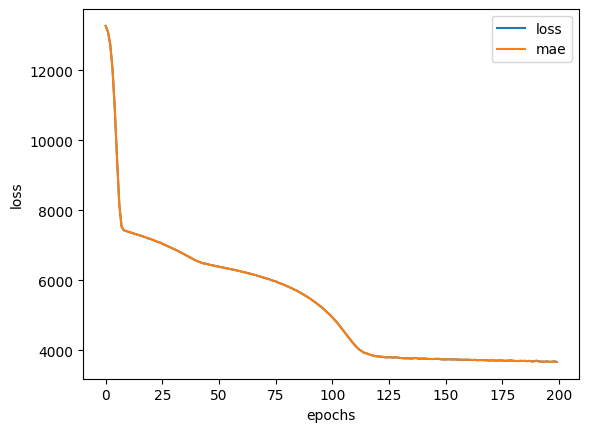

In [83]:
#plot loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data(normalization and Standarization)

<Axes: ylabel='Frequency'>

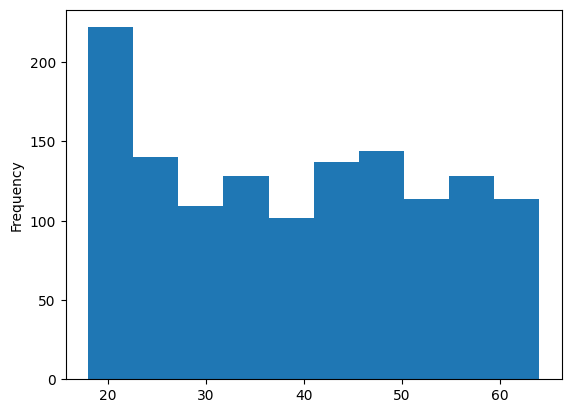

In [84]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

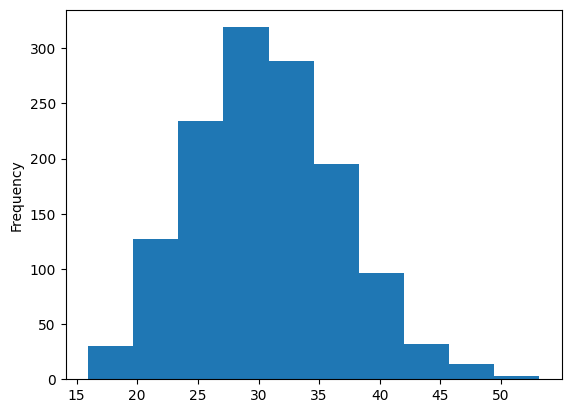

In [85]:
X["bmi"].plot(kind="hist")

In [88]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In terms of scaling values, neural networks prefer normalization

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [91]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
#creat X & y
X = insurance.drop("charges", axis=1)
y=insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct.fit(X_train)
#transofrm train & test data with  normalization and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [92]:
#Build the neural network model
tf.random.set_seed(42)
#1. create the model
insurance_model_2 = tf.keras.Sequential ([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
insurance_model_2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13344.1738 - mae: 13344.1738
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13336.1221 - mae: 13336.1221
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13315.9707 - mae: 13315.9707
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13272.9893 - mae: 13272.9893
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13195.7705 - mae: 13195.7705
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13073.3760 - mae: 13073.3760
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12895.5830 - mae: 12895.5830
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12652.2285 - mae: 12652.2285
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12333.1016 - mae: 12333.1016
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11933.37